# EDA Precio de Surtidores

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ps = pd.read_csv(r'C:\Users\francisco.chedufau\Downloads\precios-en-surtidor-resolucin-3142016.csv', delimiter=',')

In [3]:
np.shape(ps)

(35589, 19)

In [4]:
ps.columns

Index(['indice_tiempo', 'idempresa', 'cuit', 'empresa', 'direccion',
       'localidad', 'provincia', 'region', 'idproducto', 'producto',
       'idtipohorario', 'tipohorario', 'precio', 'fecha_vigencia',
       'idempresabandera', 'empresabandera', 'latitud', 'longitud', 'geojson'],
      dtype='object')

In [5]:
col_NaN = ps.isnull().any()
print(col_NaN,'\r\n')

indice_tiempo       False
idempresa           False
cuit                False
empresa             False
direccion            True
localidad           False
provincia           False
region               True
idproducto          False
producto            False
idtipohorario       False
tipohorario         False
precio              False
fecha_vigencia      False
idempresabandera    False
empresabandera      False
latitud              True
longitud             True
geojson              True
dtype: bool 



In [6]:
total = ps.isnull().sum().sort_values(ascending=False)
percent = (ps.isnull().sum()/ps.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
region,2818,0.079182
geojson,72,0.002023
latitud,72,0.002023
longitud,72,0.002023
direccion,14,0.000393
idempresa,0,0.000000


In [7]:
q_provincias = len(ps['provincia'].unique())
print(f'En total hay {q_provincias} Provincias\r\n')
print("\n", ps['provincia'].unique())

En total hay 24 Provincias


 ['BUENOS AIRES' 'CHUBUT' 'SAN LUIS' 'SANTA FE' 'ENTRE RIOS' 'RIO NEGRO'
 'CHACO' 'SANTIAGO DEL ESTERO' 'MENDOZA' 'CATAMARCA' 'CORDOBA' 'SALTA'
 'MISIONES' 'TUCUMAN' 'CORRIENTES' 'LA PAMPA' 'LA RIOJA' 'CAPITAL FEDERAL'
 'SANTA CRUZ' 'NEUQUEN' 'JUJUY' 'FORMOSA' 'SAN JUAN' 'TIERRA DEL FUEGO']


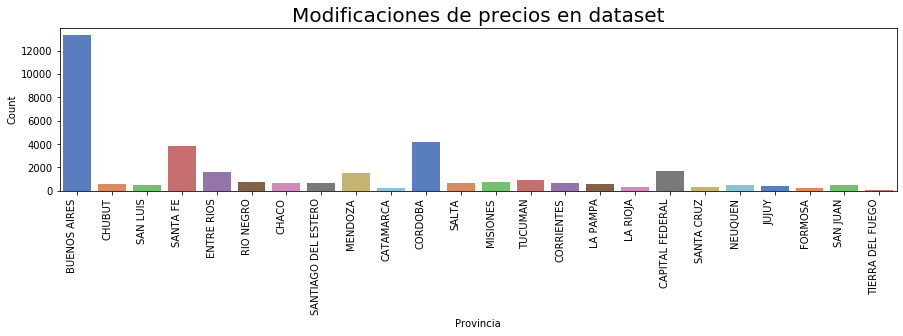

In [9]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="provincia",data=ps, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Modificaciones de precios en dataset',size = 20)
plt.xlabel("Provincia")
plt.ylabel("Count")
plt.show()

In [11]:
ps1810 = ps.loc[ps['indice_tiempo']=="2018-10"]

In [12]:
ps1910 = ps.loc[ps['indice_tiempo']=="2019-10"]

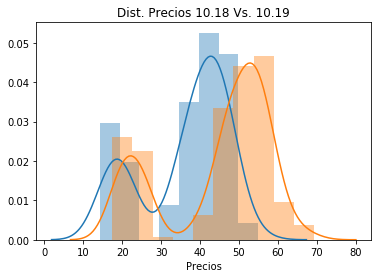

In [13]:
sns.distplot((ps1810.precio))
sns.distplot((ps1910.precio))
plt.title('Dist. Precios 10.18 Vs. 10.19')
plt.xlabel('Precios')
plt.show()

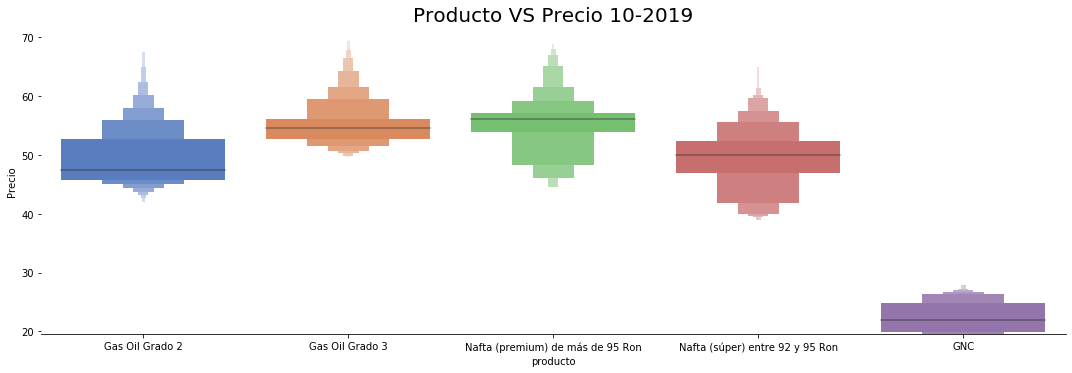

In [14]:
g = sns.catplot(x="producto",y="precio",data=ps1910, kind="boxen", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=0)
g = g.set_ylabels("Precio")
plt.title('Producto VS Precio 10-2019',size = 20)
plt.show()

In [60]:
psnf = ps.loc[ps['producto']=="Nafta (súper) entre 92 y 95 Ron"]
psnf.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
8,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,14.87,2017-04-06 20:55:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
9,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,14.87,2017-04-06 20:55:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
18,2019-09,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,50.09,2019-09-19 00:00:00,2,YPF,-33.679540,-65.469880,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
19,2019-09,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,50.09,2019-09-19 00:00:00,2,YPF,-33.679540,-65.469880,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
28,2019-09,9405,30-71512545-1,2MIL 3C S.R.L.,AV. 101 Nº 6211 (RUTA 8),SAN MARTIN,BUENOS AIRES,NaN,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,46.46,2019-09-19 08:47:00,28,PUMA,-34.561286,-58.588248,"{""type"":""Point"",""coordinates"":[-58.588248,-34...."
29,2019-09,9405,30-71512545-1,2MIL 3C S.R.L.,AV. 101 Nº 6211 (RUTA 8),SAN MARTIN,BUENOS AIRES,NaN,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,46.46,2019-09-19 08:47:00,28,PUMA,-34.561286,-58.588248,"{""type"":""Point"",""coordinates"":[-58.588248,-34...."
34,2019-09,2530,30-70833125-9,4 GNC S.A.,LA QUEMADA 2189,FIRMAT,SANTA FE,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,50.70,2019-09-21 06:00:00,1,BLANCA,-33.463870,-61.496510,"{""type"":""Point"",""coordinates"":[-61.49651,-33.4..."
35,2019-09,2530,30-70833125-9,4 GNC S.A.,LA QUEMADA 2189,FIRMAT,SANTA FE,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,50.70,2019-09-21 06:00:00,1,BLANCA,-33.463870,-61.496510,"{""type"":""Point"",""coordinates"":[-61.49651,-33.4..."
42,2019-07,6661,30-61502503-4,501AGROPETROLERA CHAJARI S.R.L.,RUTA 14 KM 321,CHAJARI,ENTRE RIOS,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,48.94,2019-07-05 18:13:00,3,ESSO PETROLERA ARGENTINA S.R.L,-30.818500,-58.044250,"{""type"":""Point"",""coordinates"":[-58.04425,-30.8..."
43,2019-07,6661,30-61502503-4,501AGROPETROLERA CHAJARI S.R.L.,RUTA 14 KM 321,CHAJARI,ENTRE RIOS,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,48.94,2019-07-05 18:13:00,3,ESSO PETROLERA ARGENTINA S.R.L,-30.818500,-58.044250,"{""type"":""Point"",""coordinates"":[-58.04425,-30.8..."


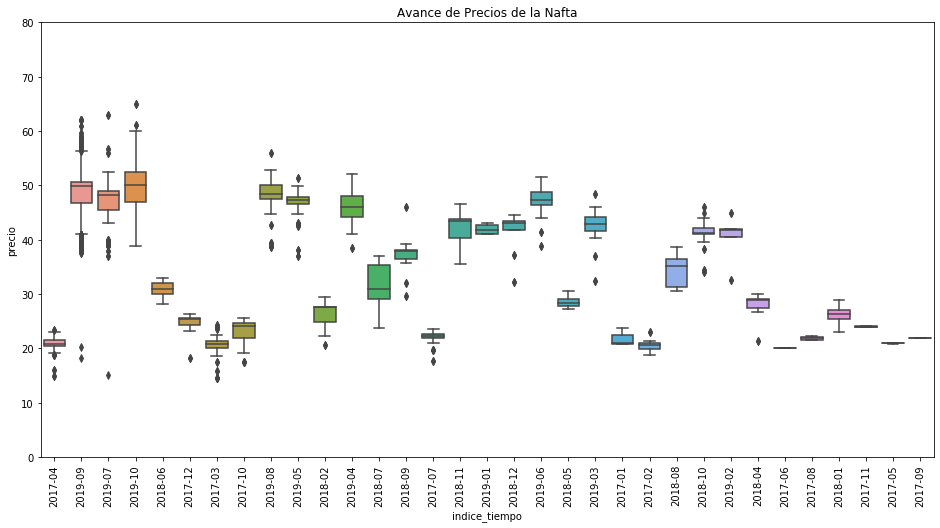

In [92]:
var = 'indice_tiempo' 
data = pd.concat([psnf['precio'], psnf[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="precio", data=data,)
fig.axis(ymin=0, ymax=80);
plt.title('Avance de Precios de la Nafta');
plt.xticks(rotation=90);

In [15]:
#Dataset de cotización dolar
dolar = pd.read_csv(r'C:\Users\francisco.chedufau\Downloads\dolarhistorico.csv', decimal=b',')
dolar.head()

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,08.11.2019,59.5000,59.6750,59.6750,59.4650,"-0,17%"
1,07.11.2019,59.6000,59.7750,59.7750,59.5800,"-0,10%"
2,06.11.2019,59.6625,59.6625,59.6625,59.6575,"0,00%"
3,05.11.2019,59.6600,59.6050,59.6750,59.3710,"0,02%"
4,04.11.2019,59.6500,59.5290,59.7600,59.4780,"0,01%"


In [16]:
dolar['Fecha'] = pd.to_datetime(dolar['Fecha'])
dolar.drop(['Último','Máximo','Mínimo','% var.'], axis = 1, inplace = True)
dolar = dolar.set_index('Fecha')
dolar.head()

,Apertura
Fecha,
2019-08-11,59.6750
2019-07-11,59.7750
2019-06-11,59.6625
2019-05-11,59.6050
2019-04-11,59.5290


In [17]:
dolar['Mesaño'] = dolar.index.strftime('%Y-%m')
dolar.head()

,Apertura,Mesaño
Fecha,,
2019-08-11,59.6750,2019-08
2019-07-11,59.7750,2019-07
2019-06-11,59.6625,2019-06
2019-05-11,59.6050,2019-05
2019-04-11,59.5290,2019-04


In [18]:
dolar2 = dolar.groupby(by=['Mesaño']) ['Apertura'].agg({'Peso to Dolar' : np.mean})


C:\Users\francisco.chedufau\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [19]:
#Agrupación dataset de precios de surtidor
ps = pd.merge(ps, dolar2, how = 'left', left_on = 'indice_tiempo', right_index = True)
ps.head()
ps2 = ps.groupby(by = ['indice_tiempo','producto','provincia']) ['precio', 'Peso to Dolar'].agg({'promedio' : np.mean})
ps2 = ps2.reset_index()

C:\Users\francisco.chedufau\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [20]:
ps2 = ps2.set_index('indice_tiempo')

In [22]:
ps2.head()

producto     provincia promedio              
                                       precio Peso to Dolar
indice_tiempo                                              
2016-04            GNC  BUENOS AIRES    12.49     14.393586
2016-06            GNC  BUENOS AIRES    11.94     14.376814
2016-06            GNC       NEUQUEN     9.90     14.376814
2016-07            GNC       TUCUMAN    10.69     14.857545
2016-08            GNC       TUCUMAN    10.68     14.791987

In [23]:
psnf = ps2.loc[ps2['producto']=="Nafta (súper) entre 92 y 95 Ron"]
psnf.head()

producto     provincia promedio  \
                                                               precio   
indice_tiempo                                                           
2017-01        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  21.1900   
2017-01        Nafta (súper) entre 92 y 95 Ron       CORDOBA  22.1425   
2017-01        Nafta (súper) entre 92 y 95 Ron         SALTA  20.8000   
2017-02        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  20.5720   
2017-02        Nafta (súper) entre 92 y 95 Ron       CORDOBA  21.2900   

                             
              Peso to Dolar  
indice_tiempo                
2017-01           16.157190  
2017-01           16.157190  
2017-01           16.157190  
2017-02           15.852825  
2017-02           15.852825

In [24]:
psbanf = psnf.loc[psnf['provincia']=="BUENOS AIRES"]
psbanf.head()

producto     provincia   promedio  \
                                                                 precio   
indice_tiempo                                                             
2017-01        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  21.190000   
2017-02        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  20.572000   
2017-03        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  20.215000   
2017-04        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  20.558571   
2017-06        Nafta (súper) entre 92 y 95 Ron  BUENOS AIRES  19.990000   

                             
              Peso to Dolar  
indice_tiempo                
2017-01           16.157190  
2017-02           15.852825  
2017-03           15.841292  
2017-04           15.846475  
2017-06           16.305896

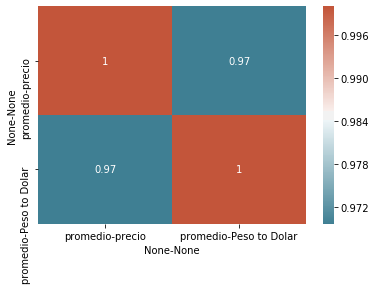

In [25]:
corrmat = psbanf.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))